### Краткое описание

Задача проекта заключается в том, чтобы провести разведывательный анализ данных для последующего создания модели, предсказывающей результаты госэкзамена по математике учащихся.<br><br> Сами данные принадлежат  одному  из проектов UNICEF, цель которого в том, чтобы отследить влияние условий жизни учащихся<br> в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.<br>

### Первоначальная оценка данных

Импортируем необходимые для работы библиотеки:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Далее загружаем наши данные. Назовём наш датасет stud:

In [3]:
stud = pd.read_csv('stud_math.csv')

Получим первичную информацию о данных: 5 первых строк, 5 случайных, описание всей базы и  подробное описание числовых признаков.

Пять первых строк:

In [5]:
display(stud.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Пять случайно выбранных строк:

In [6]:
display(stud.sample(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
71,GP,M,15,U,GT3,T,4.0,2.0,other,other,...,-12.0,yes,yes,no,3.0,3.0,3.0,3.0,0.0,50.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,...,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,...,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
255,GP,M,17,U,LE3,T,1.0,1.0,health,other,...,-3.0,yes,yes,no,4.0,4.0,4.0,5.0,2.0,40.0
246,GP,M,17,U,GT3,T,2.0,3.0,other,other,...,-3.0,yes,yes,no,5.0,2.0,2.0,2.0,4.0,65.0


Информация о датафрейме в целом:

In [7]:
display(stud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

None

Подробное описание числовых столбцов: 

In [8]:
display(stud.describe())

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Предварительно уже можно отметить сильное отличие максимумов по столбцам Fedu и absences от величин
их 75%-ного уровня,  а также отрицательное значение минимума по столбцу famrel. 
Кроме того, обращает на себя внимание присутствие столбца studytime, granular, которого не было в описании к заданию.

В задании к модулю уже имеется описание столбцов, что позволяет сразу предпринять определённые действия для анализа. 
Однако продолжим исследование на тот случай, если бы описания не было или оно было бы неточным.
Отметим, что минимумы, максимумы и значения персентилей целочисленные. Будем исходить из этого в дальнейшем, когда понадобится
заполнять пропуски.

### Деление переменных на типы:

In [9]:
VarCol = stud.select_dtypes(object).columns
NumCol = stud.select_dtypes(exclude = object).columns
print(len(VarCol),'переменных типа object(номинативных):', VarCol)
print(len(NumCol),'переменных типа int и float(числовых):', NumCol)

17 переменных типа object(номинативных): Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
13 переменных типа int и float(числовых): Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')


Рассмотрим признаки с точки зрения полноты. Посчитаем процент пропусков в каждом признаке и расположим в порядке убывания:

In [26]:
round(100 * stud.isna().sum() / stud.shape[0],1).sort_values(ascending = False)

Pstatus                11.4
paid                   10.1
famsup                  9.9
Fjob                    9.1
internet                8.6
romantic                7.8
guardian                7.8
traveltime              7.1
famsize                 6.8
famrel                  6.8
Fedu                    6.1
failures                5.6
higher                  5.1
Mjob                    4.8
reason                  4.3
address                 4.3
nursery                 4.1
health                  3.8
activities              3.5
absences                3.0
freetime                2.8
schoolsup               2.3
goout                   2.0
studytime               1.8
studytime, granular     1.8
score                   1.5
Medu                    0.8
age                     0.0
sex                     0.0
school                  0.0
dtype: float64

То же самое в асболютном выражении:

In [10]:
round(stud.isna().sum()).sort_values(ascending = False)

Pstatus                45
paid                   40
famsup                 39
Fjob                   36
internet               34
romantic               31
guardian               31
traveltime             28
famsize                27
famrel                 27
Fedu                   24
failures               22
higher                 20
Mjob                   19
reason                 17
address                17
nursery                16
health                 15
activities             14
absences               12
freetime               11
schoolsup               9
goout                   8
studytime               7
studytime, granular     7
score                   6
Medu                    3
age                     0
sex                     0
school                  0
dtype: int64

На первый взгляд кажется, что пропусков относительно немного, однако если попытаться удалить их все, то от имеющегося датасета
практически ничего не останется:

In [11]:
DrStud = stud.dropna()
print('В результате удаления пропусков остаётся', str(round(100 * (DrStud.shape[0]/stud.shape[0]),1)) +' %','строк')

В результате удаления пропусков остаётся 24.6 % строк


### Работа с числовыми переменными

In [12]:
# Для начала посмотрим на корреляцию числовых признаков между собой.
round(stud.corr(),2)

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.00,-0.16,-0.14,0.08,-0.02,0.23,0.02,0.07,0.03,0.14,-0.07,0.09,-0.16
Medu,-0.16,1.00,0.28,-0.17,0.08,-0.25,-0.08,-0.01,0.03,0.06,-0.05,-0.01,0.21
Fedu,-0.14,0.28,1.00,0.03,0.06,-0.15,-0.06,0.04,-0.07,-0.02,0.03,0.00,0.08
traveltime,0.08,-0.17,0.03,1.00,-0.10,0.06,0.10,-0.02,-0.02,0.04,-0.02,-0.05,-0.07
studytime,-0.02,0.08,0.06,-0.10,1.00,-0.18,-1.00,0.05,-0.12,-0.05,-0.08,-0.03,0.12
failures,0.23,-0.25,-0.15,0.06,-0.18,1.00,0.18,-0.02,0.10,0.12,0.08,0.06,-0.34
"studytime, granular",0.02,-0.08,-0.06,0.10,-1.00,0.18,1.00,-0.05,0.12,0.05,0.08,0.03,-0.12
famrel,0.07,-0.01,0.04,-0.02,0.05,-0.02,-0.05,1.00,0.18,0.08,0.08,-0.08,0.06
freetime,0.03,0.03,-0.07,-0.02,-0.12,0.10,0.12,0.18,1.00,0.30,0.06,0.01,0.02
goout,0.14,0.06,-0.02,0.04,-0.05,0.12,0.05,0.08,0.30,1.00,-0.02,-0.05,-0.13


На этом этапе незаметно какой-то значимой корреляции между признаками, кроме случая с ***studytime***  и ***studytime, granular***. 
Удалим полностью скоррелированный столбец studytime, granular из наших данных.

In [13]:
stud = stud.drop('studytime, granular', axis=1)
NumCol = stud.select_dtypes(exclude = object).columns #обновляем список NumCol для последующей работы с ним

Посмотрим распределение признака для числовых переменных 

In [14]:
# Выведем количество уникальных значений признака и сами значения, если их не более 10:
for i in range(0,len(NumCol)):
    if stud[NumCol[i]].nunique() < 11:
        print('в', NumCol[i], 'количество уникальных значений:',stud[NumCol[i]].nunique(),
              stud[NumCol[i]].unique())
    else:
        print('в', NumCol[i], 'количество уникальных значений:',stud[NumCol[i]].nunique())

в age количество уникальных значений: 8 [18 17 15 16 19 22 20 21]
в Medu количество уникальных значений: 5 [ 4.  1.  3.  2. nan  0.]
в Fedu количество уникальных значений: 6 [ 4.  1.  2.  3. 40. nan  0.]
в traveltime количество уникальных значений: 4 [ 2.  1.  3. nan  4.]
в studytime количество уникальных значений: 4 [ 2.  3.  1. nan  4.]
в failures количество уникальных значений: 4 [ 0.  3. nan  2.  1.]
в famrel количество уникальных значений: 6 [ 4.  5.  3. nan -1.  2.  1.]
в freetime количество уникальных значений: 5 [ 3.  2.  4.  1.  5. nan]
в goout количество уникальных значений: 5 [ 4.  3.  2.  1.  5. nan]
в health количество уникальных значений: 5 [ 3.  5.  1.  2.  4. nan]
в absences количество уникальных значений: 36
в score количество уникальных значений: 18


Для  Medu, Fedu, traveltime, studytime, failures, freetime, goout и health признак принимает 4 или 5 значений. В случае с Fedu 
значение 40, очевидно, является выбросом, то же самое, видимо, касается и значения -1 в famrel. 

Часть из упомянутых признаков принимает целочисленные значения от 0 до 4, другая часть - от 1 до 5. В определённых случаях 
отсутствуют нули. Позже можно унифицировать их значения.

Отдельно рассмотрим признаки age, absences и score.

#### Medu

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

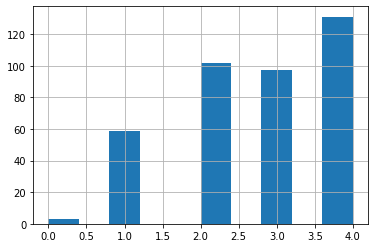

In [15]:
stud.Medu.hist()
stud.Medu.describe()

Признак может принимать 5 дискретных значений. В целом просматривается небольшая тенденция к росту. Содержится 3 пропуска. 
Заполнять их будем медианными значениями, поскольку средняя сама по себе станет выбросом. Нолями заполнять их нет смысла, 
так как ноль в данном случае один из элементов оценки и содержится очень небольшое количество раз.  

In [16]:
stud.Medu = stud.Medu.apply(lambda x: x if x in [0,1,2,3,4] else stud.Medu.median())

#### Fedu

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

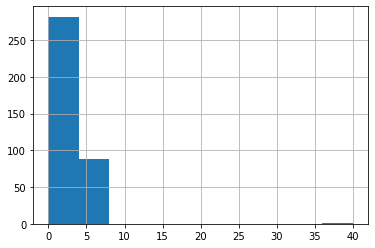

In [17]:
stud.Fedu.hist()
stud.Fedu.describe()

По признаку Fedu заметен выброс. Уточним его с помощью функции value_counts:

In [18]:
stud.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Таким образом в признаке есть один явный выброс со значением 40, при том, что признак имеет значения только 0,1,2,3,4. <br> Значение 0 содержится у двух строк. В ***Medu*** было  у трёх. Количество пропусков по признаку ***Fedu*** составляет 24. Заполним их медианами.

In [19]:
stud.Fedu = stud.Fedu.apply(lambda x: x if x in [0,1,2,3,4,40] else stud.Fedu.median())

In [20]:
stud = stud.loc[stud.Fedu <= 4] # Удалим значение с выбросом

#### traveltime

count    366.000000
mean       1.434426
std        0.690297
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

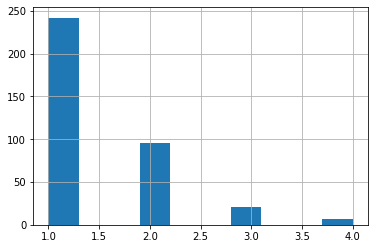

In [21]:
stud.traveltime.hist()
stud.traveltime.describe()

Явных выбросов по признаку нет. Пропуски будем заполнять медианой.

In [22]:
stud.traveltime = stud.traveltime.apply(lambda x: x if x in [0,1,2,3,4] else stud.traveltime.median())

#### studytime

count    387.000000
mean       2.036176
std        0.841744
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

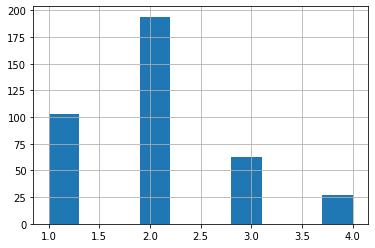

In [23]:
stud.studytime.hist()
stud.studytime.describe()

Распределение признака не вызывает подозрений. Наибольшее доля значений приходится на 2(около половины значений признака).
Здравый смысл подсказывает, что с ростом времени, уделяемого обучению в среднем должны увеличиваться и результаты, но на парной корреляции,рассмотренной выше, этого не было заметно <br> Пропуски заполним медианой. 

In [24]:
stud.studytime = stud.studytime.apply(lambda x: x if x in [0,1,2,3,4] else stud.studytime.median())

#### freetime

count    383.000000
mean       3.234987
std        0.993238
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

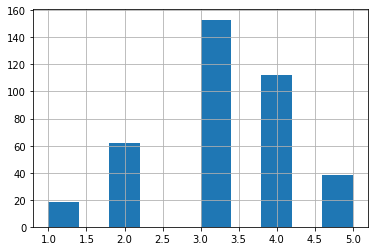

In [25]:
stud.freetime.hist()
stud.freetime.describe()

Признаки ***studytime*** и ***freetime*** не содержат явных выбросов, пропусков в них 7 и 11 соответственно. Заполняться они будут, как и в
предыдущих случаях медианами.

In [26]:
stud.freetime = stud.freetime.apply(lambda x: x if x in [1,2,3,4,5] else stud.freetime.median())

#### failures

count    372.000000
mean       0.338710
std        0.743929
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

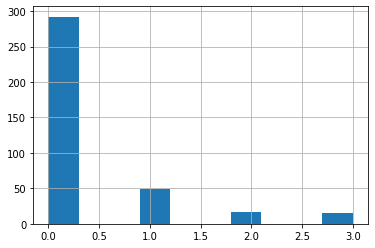

In [27]:
stud.failures.hist()
stud.failures.describe()

Явных выбросов в failures нет, при этом почти 3/4 всех строк приходится на значение признака 0. Пропусков 22, заполним
их значения медианой.

In [28]:
stud.failures = stud.failures.apply(lambda x: x if x in [0,1,2,3] else stud.failures.median())

#### famrel

count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

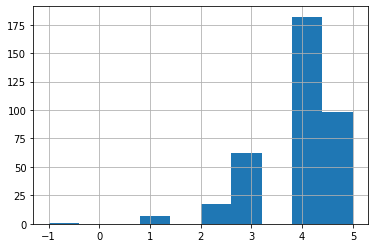

In [29]:
stud.famrel.hist()
stud.famrel.describe()

Как уже отмечалось прежде, в признаке famrel есть ярко выраженный выброс. Значение -1 не характерно для признака, выходит за 
границы разброса,тем более согласно описанию его вообще не должно было быть. Вероятно, была допущена ошибка при вводе данных.

In [30]:
# Рассчитаем границы выбросов
median = stud.famrel.median()
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


In [31]:
# Уточним распределение уникальных значений по признаку
stud.famrel.value_counts()

 4.0    182
 5.0     98
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

27 имеющихся пропусков заполним медианным значением. В данном случае это 4.

In [32]:
# Заполняем медианой пропуски
stud.famrel = stud.famrel.apply(lambda x: x if x in [-1,1,2,3,4,5] else stud.famrel.median())
# Удаляем найдённые выбросы
stud = stud.loc[stud.famrel > 0] # Удалим значение с выбросом

#### goout

count    385.000000
mean       3.111688
std        1.115933
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

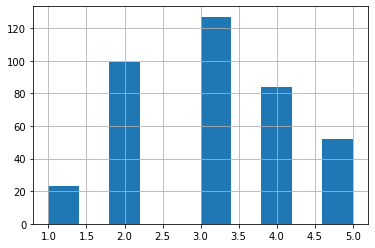

In [33]:
stud.goout.hist()
stud.goout.describe()

По виду распределение признака близко к нормальному. В данном случае явных выбросов нет, пропущенные значения будут заполнены медианой.

In [34]:
stud.goout = stud.goout.apply(lambda x: x if x in [1,2,3,4,5] else stud.goout.median())

#### health

count    378.000000
mean       3.526455
std        1.397455
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

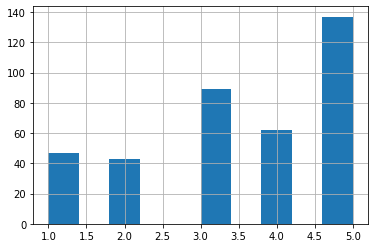

In [36]:
stud.health.hist()
stud.health.describe()

Распределение данного признака не выделяется чем-либо особо. Из графика видно, что наибольшая частота достигаются при 
увеличении значения признака. 15 пропусков заполним медианой = 4

In [37]:
stud.health = stud.health.apply(lambda x: x if x in [1,2,3,4,5] else stud.health.median())

#### absences

count    381.000000
mean       7.270341
std       23.523737
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

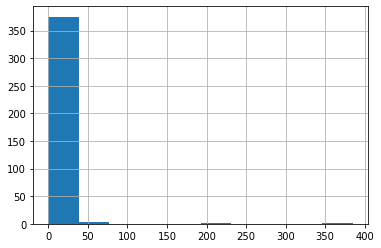

In [38]:
stud.absences.hist()
stud.absences.describe()

In [57]:
stud.absences.value_counts()

0.0      111
2.0       60
4.0       52
6.0       31
8.0       21
10.0      17
12.0      12
14.0      11
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [39]:
# Найдём статистические границы распределеня признака:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [40]:
# Посмотрим на распределение признака и количество записей со значением больше 20
print(len(stud.loc[stud.absences > 20]),'записей','со значением больше 20')
stud.loc[stud.absences > 20].absences.value_counts()

17 записей со значением больше 20


22.0     3
212.0    1
23.0     1
40.0     1
38.0     1
30.0     1
75.0     1
21.0     1
385.0    1
28.0     1
24.0     1
56.0     1
26.0     1
54.0     1
25.0     1
Name: absences, dtype: int64

Распределение признака выглядит странно: основная часть значений лежит от 0 до 20, и просматриваются сразу несколько
выбросов.<br>Значения 212 и 385 не соответствуют основному распределению. Помимо них превышают верхнюю границу выброса 14 значений:
12 имеющихся пропусков заполним медианой,равной 4, аналогично поступим и со значениями, приевышающими верхнюю границу IQR.

In [41]:
stud.absences = stud.absences.apply(lambda x: x if ((x >= -12) and  (x <= 385)) else stud.absences.median())
stud = stud.loc[stud.absences < 100] # удалим слишком большие значения

In [42]:
# Теперь заменим медианой и значения больше 20:
stud.absences = stud.absences.apply(lambda x: x if ((x >= -12) and  (x <= 20)) else stud.absences.median())

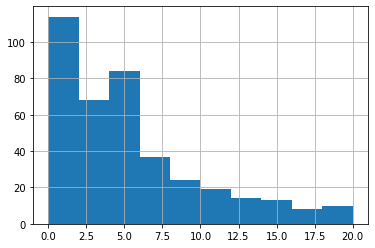

In [43]:
stud.absences.hist()

#### age

count    391.000000
mean       2.759591
std        1.097084
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

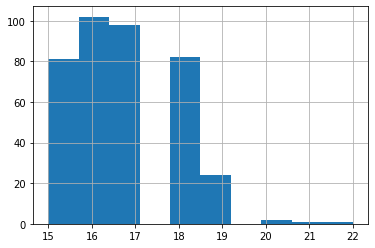

In [44]:
stud.age.hist()
stud.Medu.describe()

На графике видно, что распределение признака c 15 до 18 близко к равномерно, а далее существенно отличается. 
Что касается выбросов, то под подозрение попадают значения от 20 до 22. Проверим их.

In [45]:
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Верхней границей для определения выбросов является значение 21, однако в данном случае, здравый смысл подсказывает, что 
максимальным значением возраста обучения является 18 лет.
В реальной практике возможна ситуация позднего поступления в школу, поэтому значение 19 ещё, вероятно, имеет смысл рассматривать 
как реальное, однако уже 20 и более лет выглядят неправдоподобно.
Поэтому все значения больше 19 будут рассматриваться как выбросы.

#### score:

count    385.000000
mean      52.207792
std       22.962457
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

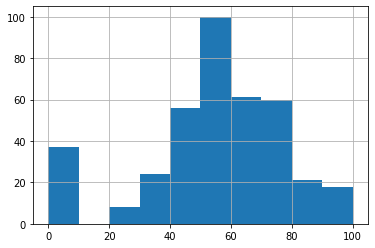

In [46]:
# Подробная информация по исследуемому признаку scores:
stud.score.hist()
stud.score.describe()

Распределение похоже на нормальное со странным отсутствующим фрагментом. Иначе можно рассматривать разрыв между значениями,
как выброс в самом начале, то есть речь возможно идёт о выбросах от 0 до 20.
Проверим это:

In [47]:
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


In [48]:
# Посмотрим на распределение признака количественно:
stud.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     30
60.0     30
70.0     27
45.0     26
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
95.0      5
85.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Как видно исходя из анализа конкретных значений, признак может принимать значения от 0 дл 100, при этом кратные 5. 
Значения 5,10,15 отсутствуют, что заметно и на гистограмме. При этом, учитывая распределение на графике и имеющийся странный пробел, значение признака 0 возможно тоже придётся исключить или заменить.
Заполним пропуски медианой. 

In [49]:
stud.score = stud.score.apply(lambda x: stud.score.median() if x % 5 != 0  else x)

Посмотрим, как изменилась корреляция числовых признаков после преобразований:

In [50]:
round(stud.corr(),3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000,-0.163,-0.149,0.097,-0.013,0.220,0.056,0.008,0.124,-0.065,0.146,-0.149
Medu,-0.163,1.000,0.598,-0.162,0.077,-0.243,-0.020,0.025,0.059,-0.049,0.065,0.208
Fedu,-0.149,0.598,1.000,-0.131,0.002,-0.258,-0.029,-0.025,0.045,0.007,-0.025,0.119
traveltime,0.097,-0.162,-0.131,1.000,-0.105,0.060,-0.034,-0.005,0.055,-0.046,-0.033,-0.057
studytime,-0.013,0.077,0.002,-0.105,1.000,-0.161,0.024,-0.121,-0.052,-0.072,-0.069,0.113
failures,0.220,-0.243,-0.258,0.060,-0.161,1.000,-0.006,0.092,0.114,0.069,0.069,-0.325
famrel,0.056,-0.020,-0.029,-0.034,0.024,-0.006,1.000,0.157,0.057,0.093,-0.066,0.059
freetime,0.008,0.025,-0.025,-0.005,-0.121,0.092,0.157,1.000,0.286,0.064,0.094,0.020
goout,0.124,0.059,0.045,0.055,-0.052,0.114,0.057,0.286,1.000,-0.013,0.109,-0.120
health,-0.065,-0.049,0.007,-0.046,-0.072,0.069,0.093,0.064,-0.013,1.000,-0.019,-0.070


Вероятно удалить как незначимый мы можем только признак ***freetime***. Остальные пока есть смысл исследовать.

In [51]:
stud = stud.drop('freetime', axis=1)

### Исследование номинативных признаков

Посмотрим, какие значения принимают наши номинативные переменные и сколько их(без учёта nan):

In [52]:
for i in range(0,len(VarCol)):
    print('в', VarCol[i], 'количество уникальных значений:', stud[VarCol[i]].nunique(), stud[VarCol[i]].unique())

в school количество уникальных значений: 2 ['GP' 'MS']
в sex количество уникальных значений: 2 ['F' 'M']
в address количество уникальных значений: 2 ['U' nan 'R']
в famsize количество уникальных значений: 2 [nan 'GT3' 'LE3']
в Pstatus количество уникальных значений: 2 ['A' nan 'T']
в Mjob количество уникальных значений: 5 ['at_home' 'health' 'other' 'services' 'teacher' nan]
в Fjob количество уникальных значений: 5 ['teacher' 'other' nan 'health' 'services' 'at_home']
в reason количество уникальных значений: 4 ['course' 'other' 'home' 'reputation' nan]
в guardian количество уникальных значений: 3 ['mother' 'father' 'other' nan]
в schoolsup количество уникальных значений: 2 ['yes' 'no' nan]
в famsup количество уникальных значений: 2 ['no' 'yes' nan]
в paid количество уникальных значений: 2 ['no' nan 'yes']
в activities количество уникальных значений: 2 ['no' 'yes' nan]
в nursery количество уникальных значений: 2 ['yes' 'no' nan]
в higher количество уникальных значений: 2 ['yes' nan 'no'

Таким образом 13 переменных принимают лишь 2 значения, в том числе 8 принимают значения  *yes* или *no*. ***Mjob*** и ***Fjob*** принимают одни
и те же 5 уникальных значений. Отдельно 4 уникальных значения у ***reason*** и 3 у ***guardian***.
Имеет смысл рассмотреть распределение значений в признаках, принимающих значения только *yes* и *no* вместе.

#### Признаки со значениями yes и no

In [54]:
# Создадим словарь из признаков, содержащих  значения yes и no 
YesNoDict = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# Генерируем словарь, содержащий % значений yes,no и nan по признакам
YND = {YesNoDict[x]: [round(len(stud[stud[YesNoDict[x]] == 'yes'])/3.95,0),
                      round(len(stud[stud[YesNoDict[x]] == 'no'])/3.95,0),
                      round(stud[YesNoDict[x]].isna().sum()/3.95,0)] for x in range(0,len(YesNoDict))}

# Отобразим результат в виде сводной таблицы:
df = pd.DataFrame(YND, index= ['yes','no','nan'])
df

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
yes,13.0,55.0,39.0,49.0,75.0,89.0,76.0,31.0
no,84.0,35.0,50.0,46.0,20.0,5.0,14.0,60.0
nan,2.0,10.0,10.0,4.0,4.0,5.0,9.0,8.0


Для признака **higher** полагаю возможным заменить пропуски значениями наиболее преобладающими в выборке, то есть *yes*. 
Его значений в признаке почти 90%. В остальных случаях всё не так однозначно.

In [55]:
stud.higher = stud.higher.apply(lambda x: stud.higher.describe().top if (x != 'yes' and  x != 'no')  else x)

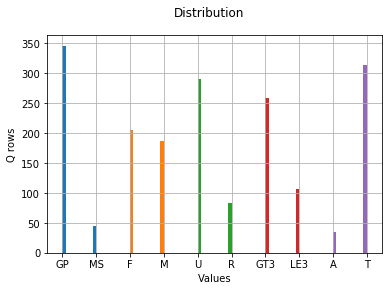

In [56]:
# Создадим словарь из признаков, содержащих  два значения, отличных от 'yes', 'no' и друг друга: 
TwoVar = ['school','sex','address','famsize','Pstatus']
# Изобразим распределение признаков по значениям на одном графике
for i in range(0,len(TwoVar)):
    stud[TwoVar[i]].hist()
    plt.suptitle("Distribution")
    plt.xlabel("Values")
    plt.ylabel("Q rows")

Судя по виду графика распределения нельзя говорить о незначимости какого-либо варианта ответа в признаке. В случае выбора школы явное лидерство у значения GP.
При это просто отбросить MS было бы неверным, поскольку из двух возможных школ мы в этом случае оставим одну, а это может существенно изменить смысл.

In [57]:
stud.school.value_counts()

GP    346
MS     45
Name: school, dtype: int64

Для подтверждения или опровержения важности каждого из ответов посмотрим распределение значений признаков подробнее. Для этого последовательно сгруппируем датафрейм по значениям каждого из признаков и посчитаем среднюю и медиану для числовых признаков.

In [58]:
# Посмотрим группировку по значениями признаков, используя медиану для усреднения значений по другим признакам
for i in range(0,len(TwoVar)):
    display(stud.groupby(TwoVar[i]).median())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
school,,,,,,,,,,,
GP,16,3.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,55.0
MS,18,2.0,2.0,2.0,2.0,0.0,4.0,3.0,3.0,3.0,50.0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
sex,,,,,,,,,,,
F,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,55.0
M,16,3.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,55.0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
address,,,,,,,,,,,
R,17,2.0,2.0,2.0,2.0,0.0,4.0,3.0,4.0,4.0,50.0
U,16,3.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,55.0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
famsize,,,,,,,,,,,
GT3,17,3.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,55.0
LE3,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,55.0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
Pstatus,,,,,,,,,,,
A,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0,6.0,55.0
T,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,55.0


In [91]:
# То же самое, используя среднюю
for i in range(0,len(TwoVar)):
    display(round(stud.groupby(TwoVar[i]).mean()))

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
school,,,,,,,,,,,
GP,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0,5.0,53.0
MS,18.0,2.0,2.0,2.0,2.0,0.0,4.0,3.0,3.0,4.0,50.0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
sex,,,,,,,,,,,
F,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,50.0
M,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0,5.0,55.0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
address,,,,,,,,,,,
R,17.0,2.0,2.0,2.0,2.0,0.0,4.0,3.0,4.0,5.0,47.0
U,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,54.0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
famsize,,,,,,,,,,,
GT3,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,51.0
LE3,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,5.0,55.0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
Pstatus,,,,,,,,,,,
A,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0,6.0,55.0
T,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,52.0


По признакам ***Pstatus*** и ***famsize*** средние значения ***score*** очень близки, а медианные одинаковы. После анализа остальных признаков вероятно имеет смысл избавиться от данных признаков в виду отсутствия значимого влияния на ***score***. <br>
Выбросов  в данных по сути нет, поэтому обрабатывать здесь мы ничего не будем.

#### Mjob & Fjob

Поскольку два признака принимают одни и те же пять значений, считаю возможным рассмотреть их вместе.

In [59]:
# Создадим словарь из признаков, содержащих  значения yes и no 
MFDict = ['Mjob','Fjob']

# Генерируем словарь, содержащий долю значений в %-тах  по признакам
MFD = {MFDict[x]: [round(len(stud[stud[MFDict[x]] == 'at_home'])/3.95,0),
                   round(len(stud[stud[MFDict[x]] == 'health'])/3.95,0),
                   round(len(stud[stud[MFDict[x]] == 'other'])/3.95,0),
                   round(len(stud[stud[MFDict[x]] == 'services'])/3.95,0),
                   round(len(stud[stud[MFDict[x]] == 'teacher'])/3.95,0),
                   round(stud[MFDict[x]].isna().sum()/3.95,0)] for x in range(0,len(MFDict))}

# Отобразим результат распределения в виде датафрейма:
df = pd.DataFrame(MFD, index= ['at_home','health','other','services','teacher','nan'])
df

,Mjob,Fjob
at_home,15.0,4.0
health,8.0,4.0
other,34.0,50.0
services,24.0,25.0
teacher,14.0,7.0
nan,5.0,9.0


In [78]:
# Теперь посмотрим на группировку по каждому из признаков:
round(stud.groupby('Mjob').mean())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
Mjob,,,,,,,,,,,,
at_home,17.0,2.0,2.0,2.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,46.0
health,16.0,4.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,5.0,61.0
other,17.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,50.0
services,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,5.0,55.0
teacher,17.0,4.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,5.0,55.0


In [60]:
round(stud.groupby('Fjob').mean())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
Fjob,,,,,,,,,,,
at_home,17.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,52.0
health,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0,6.0,56.0
other,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,5.0,51.0
services,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,51.0
teacher,16.0,4.0,4.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,59.0


При довольно схожей в среднем структуре значений числовых признаков среднее значение ***score*** колеблется от 46 до 60 в случае ***Mjob***  и  от  51  до 59 <br> в случае ***Fjob***

Посмотрим на совместное распределение в  сводной таблице, где по строчкам значения ***Mjob***, по столбцам возможные значения  ***Fjob***,
а внутри сводной таблицы  средние значения ***score***:

In [61]:
round(stud.pivot_table('score', index='Mjob', columns='Fjob',aggfunc = np.mean))

Fjob,at_home,health,other,services,teacher
Mjob,,,,,
at_home,61.0,58.0,45.0,42.0,15.0
health,NaN,65.0,58.0,55.0,55.0
other,46.0,60.0,50.0,47.0,57.0
services,45.0,51.0,57.0,53.0,63.0
teacher,55.0,50.0,52.0,54.0,66.0


В итоге какого - то выраженного тренда не просматривается, но обнаруживается странное значение ***score*** на "пересечении" первой строки и последнего столбца. Ниже видно, как оно сложилось:

In [94]:
stud[(stud.Mjob == 'at_home') & (stud.Fjob == 'teacher')] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities,nursery,higher,internet,romantic,famrel,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,no,yes,yes,NaN,no,4.0,4.0,3.0,6.0,30.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,...,no,yes,yes,no,yes,5.0,3.0,5.0,0.0,0.0


В завершении посмотрим на распределение значений в оставшихся признаках ***reason*** и  ***gurdian***

#### reason

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
reason,,,,,,,,,,,
course,17.0,3.0,2.0,2.0,2.0,0.0,4.0,3.0,4.0,4.0,50.0
home,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,5.0,51.0
other,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,6.0,55.0
reputation,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,5.0,56.0


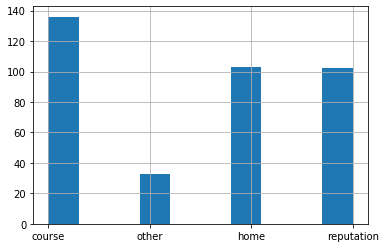

In [62]:
stud.reason.hist()
round(stud.groupby('reason').mean())

В числе причин лидирует *course*, несколько меньше значений у  *home* и *reputation*, наименьшее значение у *other*. Так или иначе все они достаточно значимы на даннй момент.

#### guardian

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
guardian,,,,,,,,,,,
father,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0,2.0,55.0
mother,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,55.0
other,19,2.0,2.0,1.0,2.0,1.0,4.0,3.0,3.0,4.0,52.5


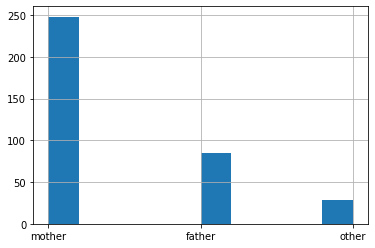

In [63]:
stud.guardian.hist()
stud.groupby('guardian').median()

In [64]:
stud.guardian.value_counts()

mother    248
father     85
other      28
Name: guardian, dtype: int64

Количество значений *mother* почти в 2 раза больше, чем у *father* и *other* вместе взятых.

In [65]:
# Временно исключим из словаря один признак
VarCol.remove('higher')
# Поменяем nan на None в номинативных признаках
for i in VarCol:
    stud[i] = stud[i].astype(str).apply(lambda x: None if x.strip() == '' else x)

Теперь попытаемся определить статистическую значимость значений номинативных признаков

In [66]:
# Поищем колонки со статититически значимыми различиями между значениями
from itertools import combinations #импортируем  
from scipy import stats

# Вернём признак higher в список
VarCol.append('higher')

# Воспользуемся функцией,рассчитывающей статистически значимые различия для признаков(колонок) 
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if stats.ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): 
            print('Найдены статистически значимые различия для колонки', column)
            break

In [67]:
# Запускаем цикл
for col in VarCol:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [78]:
stud.groupby('guardian').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
guardian,,,,,,,,,,,
father,16.447059,2.682353,2.647059,1.447059,2.011765,0.258824,3.894118,2.941176,3.705882,3.929412,53.352941
mother,16.564516,2.850806,2.435484,1.375000,2.024194,0.229839,3.959677,3.129032,3.491935,4.669355,52.540323
nan,16.966667,2.700000,2.733333,1.400000,2.133333,0.566667,4.066667,3.500000,3.766667,3.466667,51.666667
other,18.321429,2.250000,2.142857,1.571429,2.142857,0.928571,3.964286,3.071429,3.285714,6.392857,46.964286


Итак, статистически значимые различия найдены для колонок ***sex***, ***higher*** и ***romantic***. Выше уже было отмечено, что вероятно разница между значениями ***Pstatus*** и ***famsize*** не оказывает существенного влияния на ***score***, что нашло подтверждение и в данной части исследования.<br> От номинативных признаков оставим упомянутые три, остальные, вероятно, не имеет смысла рассматривать дальше. 

In [79]:
stud = stud.drop(['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'internet'], axis=1)

In [80]:
# Подсчитаем количество оставшихся в  датафрейме признаков:
stud.shape[1]

14

### Выводы

1) В данных было относительно немного пропусков по признакам, но распределены они были так, что при удалении терялось почти 3/4 строк.
Данное обстоятельство может способствовать некорректным расчётам и выводам в дальнейшем. <br><br>
2) Выбросы были найдены только в числовых признаках, конкретно в ***fedu***, ***famrel***, ***absences***  и ***age*** в небольшом количестве. 
По ***age*** выбросы определялись и графически, и с помощью квартилей, и основываясь на здравом смысле.<br><br>
3) Согласно данным по коэффициентам корреляции наибольшая по модулю корреляция наблюдается у ***score*** с ***failures***, что скорее всего объясняется снижением качества обучения при увеличении числа пропусков. <br><br>Вероятно также, что уровень образования родителей(***Medu*** & ***Fedu***) положительным образом влияет на оценки. При этом уровень образования отцов статистически более важен.<br><br> В то же время выявлена и интересная отрицательная корреляция оценок(***score***) и возраста(***age***). Возможно причиной этого служит смена прироритетов по мере взросления, что выражается в частности в положительной корреляции ***age*** с ***failures***, ***absences*** и ***goout***. <br><br>
4) В результате предобработки было уменьшено количество признаков  с 30 до 14. Оставшиеся номинативные могут быть преобразованы с помощью фиктивных переменных, что может изменить размер датафрейма.
В целом на данном этапе сложно оценить информативность данных однозначно, поскольку с одной стороны серьёзно сократилось число признаков. С другой стороны, их всё ещё немало, при этом среди числовых широко распространены признаки с порядковыми значениями, вместо непрерывных.<br>